<a href="https://colab.research.google.com/github/rexbrahh/Optimization-of-Machine-Learning-Models-for-Prediction-of-Personal-Loan-Default-Rate/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import pandas as pd

proc = pd.read_csv('indexProcessed.csv')
info = pd.read_csv('indexInfo.csv')
data = pd.read_csv('indexData.csv')

info

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [ ]:
proc.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
dtype: int64

In [ ]:
info.isnull().sum()

Region      0
Exchange    0
Index       0
Currency    0
dtype: int64

In [ ]:
data.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [ ]:
from numpy import nan

data = data.replace(0,nan)
data.fillna(data.mean(), inplace=True)

print(data.isnull().sum())

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,2.060733e+09
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,2.060733e+09
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,2.060733e+09
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,2.060733e+09
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,2.060733e+09
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,3.796964e+08
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,1.607734e+08
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,9.117370e+07
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,1.551799e+08


In [ ]:
print("Index Info")
print(info.describe())
print(info.info())
print("Index Processed")
print(proc.describe())
print(proc.info())
print("Index Data")
print(data.describe())
print(data.info())

Index Info
       Region  Exchange    Index Currency
count      14        14       14       14
unique     12        14       14       11
top     China  Euronext  J203.JO      EUR
freq        2         1        1        2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    14 non-null     object
 1   Exchange  14 non-null     object
 2   Index     14 non-null     object
 3   Currency  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None
Index Processed
                Open           High  ...        Volume       CloseUSD
count  104224.000000  104224.000000  ...  1.042240e+05  104224.000000
mean     8015.353334    8063.324234  ...  1.347646e+09    3046.729177
std      9140.563404    9196.575802  ...  4.427662e+09    3747.865623
min        54.869999      54.869999  ...  0.000000e+00      10.204900
25%      2046.887756    2057.2139

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

labelencoder = LabelEncoder()

info['Region_enc'] = labelencoder.fit_transform(info['Region'])
info['Exchange_enc'] = labelencoder.fit_transform(info['Exchange'])
info['Index_enc'] = labelencoder.fit_transform(info['Index'])
info['Currency_enc'] = labelencoder.fit_transform(info['Currency'])

info

,Region,Exchange,Index,Currency,Region_enc,Exchange_enc,Index_enc,Currency_enc
0,United States,New York Stock Exchange,NYA,USD,11,7,11,9
1,United States,NASDAQ,IXIC,USD,11,5,5,9
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD,4,2,4,4
3,China,Shanghai Stock Exchange,000001.SS,CNY,1,9,0,2
4,Japan,Tokyo Stock Exchange,N225,JPY,6,12,9,6
5,Europe,Euronext,N100,EUR,2,0,8,3
6,China,Shenzhen Stock Exchange,399001.SZ,CNY,1,10,1,2
7,Canada,Toronto Stock Exchange,GSPTSE,CAD,0,13,3,0
8,India,National Stock Exchange of India,NSEI,INR,5,6,10,5
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR,3,1,2,3


In [ ]:
info = info.drop(['Region','Exchange','Index','Currency'], axis=1)
info

,Region_enc,Exchange_enc,Index_enc,Currency_enc
0,11,7,11,9
1,11,5,5,9
2,4,2,4,4
3,1,9,0,2
4,6,12,9,6
5,2,0,8,3
6,1,10,1,2
7,0,13,3,0
8,5,6,10,5
9,3,1,2,3


In [ ]:
proc['Index_enc'] = labelencoder.fit_transform(proc['Index'])
proc['Date_enc'] = labelencoder.fit_transform(proc['Date'])
proc

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Index_enc,Date_enc
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,4,5699
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,4,5700
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,4,5701
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,4,5702
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,4,5703
...,...,...,...,...,...,...,...,...,...,...,...
104219,J203.JO,2021-05-25,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578,6,14649
104220,J203.JO,2021-05-26,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859,6,14650
104221,J203.JO,2021-05-27,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500,6,14651
104222,J203.JO,2021-05-28,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157,6,14652


In [ ]:
proc = proc.drop(['Index','Date'],axis=1)
proc

,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Index_enc,Date_enc
0,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,4,5699
1,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,4,5700
2,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,4,5701
3,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,4,5702
4,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,4,5703
...,...,...,...,...,...,...,...,...,...
104219,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578,6,14649
104220,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859,6,14650
104221,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500,6,14651
104222,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157,6,14652


In [ ]:
proc = proc.drop('Volume',axis=1)
proc = proc.drop('CloseUSD',axis=1)
proc

,Open,High,Low,Close,Adj Close,Index_enc,Date_enc
0,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,4,5699
1,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,4,5700
2,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,4,5701
3,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,4,5702
4,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,4,5703
...,...,...,...,...,...,...,...
104219,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,6,14649
104220,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,6,14650
104221,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,6,14651
104222,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,6,14652


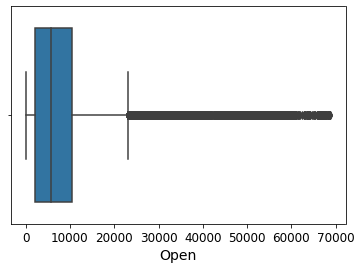

In [ ]:
import seaborn as sns

sns.boxplot(x=proc['Open'])

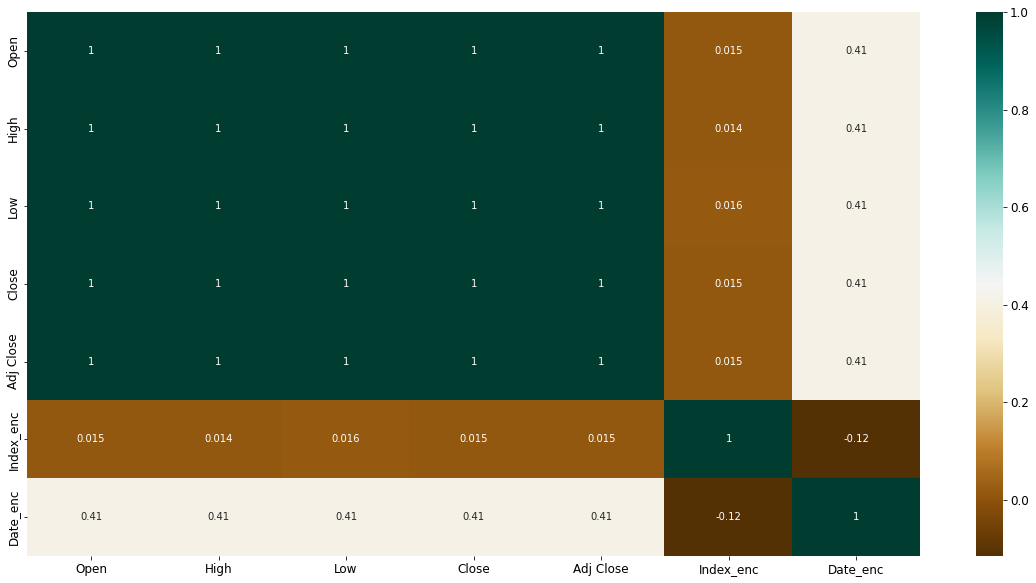

In [ ]:
plt.figure(figsize=(20,10))
c = proc.corr()
sns.heatmap(c, cmap='BrBG', annot=True)

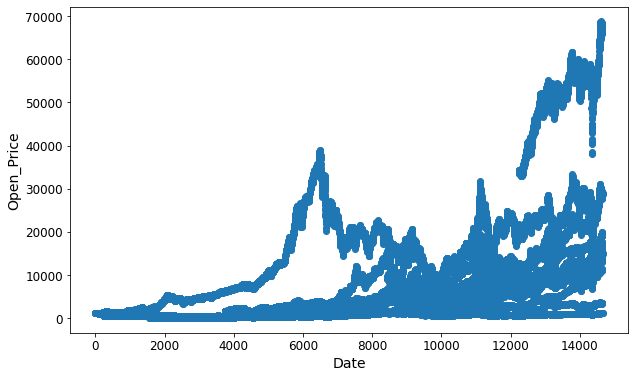

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(proc['Date_enc'],proc['Open'])
ax.set_xlabel('Date')
ax.set_ylabel('Open_Price')
plt.show()

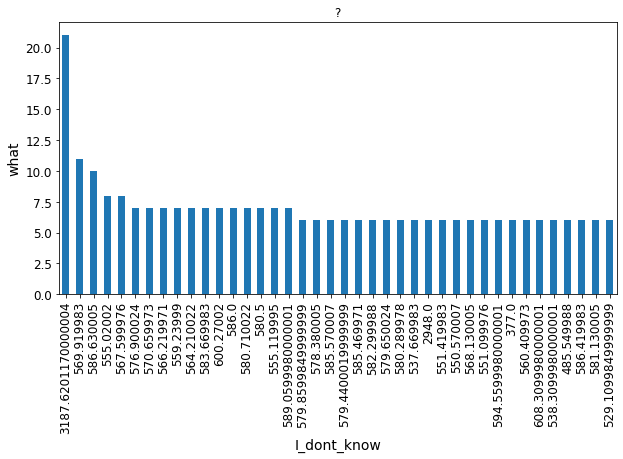

In [ ]:
proc.Open.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("?")
plt.ylabel('what')
plt.xlabel('I_dont_know')
plt.show()

In [ ]:
mean = [None]*len(proc)
proc.insert(2,'Average',None,True)
for i in range(0,len(proc)):
    mean[i] = (proc['Open'][i] +proc['High'][i]+proc['Low'][i]+proc['Close'][i]+proc['Adj Close'][i])/5
    proc['Average'][i] = mean[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
proc.head()

,Open,High,Average,Low,Close,Adj Close,Index_enc,Date_enc
0,2568.300049,2568.300049,2568.3,2568.300049,2568.300049,2568.300049,4,5699
1,2540.100098,2540.100098,2540.1,2540.100098,2540.100098,2540.100098,4,5700
2,2552.399902,2552.399902,2552.4,2552.399902,2552.399902,2552.399902,4,5701
3,2583.899902,2583.899902,2583.9,2583.899902,2583.899902,2583.899902,4,5702
4,2607.100098,2607.100098,2607.1,2607.100098,2607.100098,2607.100098,4,5703


In [ ]:
from sklearn.model_selection import train_test_split

X = proc['Average'].values.reshape(-1,1)
y = proc['Date_enc']

#X = X.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

Linear regression with normal equation

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(8313.087958548236, array([0.16111213]))

Polynomial regression

In [ ]:
import numpy.random as rnd

np.random.seed(42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly[0]

array([2.56830005e+03, 6.59616514e+06, 1.69409313e+10, 4.35093946e+13,
       1.11745180e+17])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(7475.086182107855,
 array([ 1.11468267e-08,  7.96715106e-05, -5.23753970e-09,  1.12170943e-13,
        -7.72494048e-19]))

Trees

In [ ]:
from sklearn.model_selection import train_test_split

X = proc['Date_enc'].values.reshape(-1,1).astype('int')
y = proc['Average'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
tree_clf_tuned = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tuned.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_train, y_train, cv=3, scoring="accuracy")


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


array([0.00151117, 0.00158313, 0.00165509])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(tree_clf, X_train,y_train, cv=3
                                )

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train_perfect_predictions = y_train
confusion_matrix(y_train, y_train_perfect_predictions
                )

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred, average='micro')


0.0015831324434210053

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
proc_scaled = scaler.fit(proc)

*Random Forests*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

X = proc['Average'].values.reshape(-1,1)
y = proc['Date_enc']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')

voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test,y_pred))
